### SESIÓN DE INTRODUCCIÓN A VISIÓN COMPUTACIONAL Y PROCESAMIENTO DE IMÁGENES

In [1]:
#Librerías a ocupar
import os
import numpy as np
import cv2 as cv #pip install opencv-python
from matplotlib import pyplot as plt
import pytesseract

In [2]:
#TRABAJANDO EN DIRECTORIO 
#os.chdir(r'C:\IM')

In [3]:
#ABRIR IMAGEN
img = cv.imread('aguila.jpg', cv.IMREAD_GRAYSCALE) #en escala de grises
img2 = cv.imread('aguila.jpg') #en rgb
img3 = cv.imread('lena.jpg') # en rgb
img4 = cv.imread('lena.jpg', cv.IMREAD_GRAYSCALE) # en escala de grises
img5 = cv.imread('lena1.jpg',cv.IMREAD_GRAYSCALE) #escala de grises clara
img6 = cv.imread('lena2.jpg',cv.IMREAD_GRAYSCALE) #escala de grises oscura

In [14]:
#DIMENSIONES IMAGEN
print(type(img)) # tipo de dato
height, width = img.shape[0:2] #matriz 
print(img.shape[0:2])

<class 'numpy.ndarray'>
(750, 1200)


In [16]:
img.shape

(750, 1200)

In [7]:
#VER IMAGEN 
cv.imshow('img', img)
cv.waitKey(0)

-1

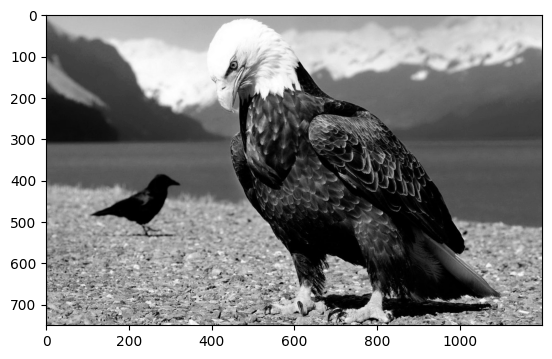

In [13]:
plt.imshow(img, cmap="gray");

In [20]:
#VER IMAGEN 
cv.imshow('img2', img2)
cv.waitKey(0)

-1

In [23]:
img2.shape

(750, 1200, 3)

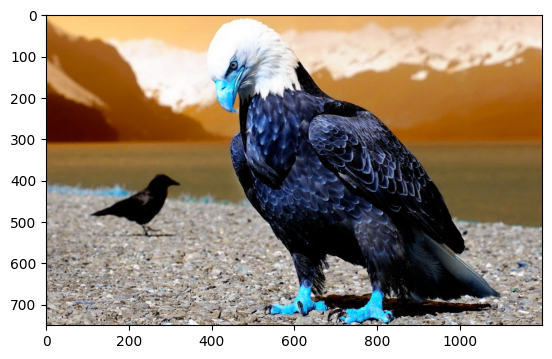

In [22]:
plt.imshow(img2);

In [24]:
#VER IMAGEN 
cv.imshow('img3', img3)
cv.waitKey(0)

-1

In [25]:
#ROTAR IMAGEN
rotationMatrix = cv.getRotationMatrix2D((width/2, height/2), 90, .5) #getRotationMatrix2D(center, angle, scale)
rotatedImage = cv.warpAffine(img, rotationMatrix, (width, height))

In [26]:
#VER IMAGEN ROTADA
cv.imshow('Imagen Rotada', rotatedImage)
cv.waitKey(0)

-1

In [27]:
#CORTAR IMAGEN
startRow = int(height*.15)
startCol = int(width*.15)
endRow = int(height*.85)
endCol = int(width*.85)

croppedImage = img[startRow:endRow, startCol:endCol]

In [ ]:
#IMAGEN ORIGINAL
cv.imshow('Original Image', img)
cv.waitKey(0)

In [ ]:
#IMAGEN CORTADA
cv.imshow('Cropped Image', croppedImage)
cv.waitKey(0)

In [ ]:
#CAMBIAR TAMAÑO
newImg = cv.resize(img, (0,0), fx=0.75, fy=0.75)
newImg = cv.resize(img, (550, 350))

In [ ]:
#IMAGEN MÁS PEQUEÑA
cv.imshow('Imagen mas chica', newImg)
cv.waitKey(0)

In [28]:
#LECTURA DE TEXTO EN IMÁGENES
#https://digi.bib.uni-mannheim.de/tesseract/tesseract-ocr-setup-3.05.02-20180621.exe
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files (x86)\Tesseract-OCR\tesseract'

In [29]:
#ABRIR IMAGEN
cambio = cv.imread('cambio.jpg')

In [32]:
#MOSTRAR IMAGEN
cv.imshow('Cambio climático', cambio)
cv.waitKey(0)

-1

In [31]:
#IMPRIMIR TEXTO (IMAGEN A CARACTER)
print(pytesseract.image_to_string('cambio.jpg'))

El cambio climético hace
referencia a 10s cambios a
largo plazo de las
temperaturas y los patrones
climéticos. Estos cambios
pueden ser naturales, pero
desde el siglo XIX, las
actividades humanas han
sido e1 principal motor del
cambio climético, debido
principalmente a la quema
de combustibles fésiles,
como el carbén, e1 petréleo
y el gas, lo que produce
gases que atrapan e1 calor.




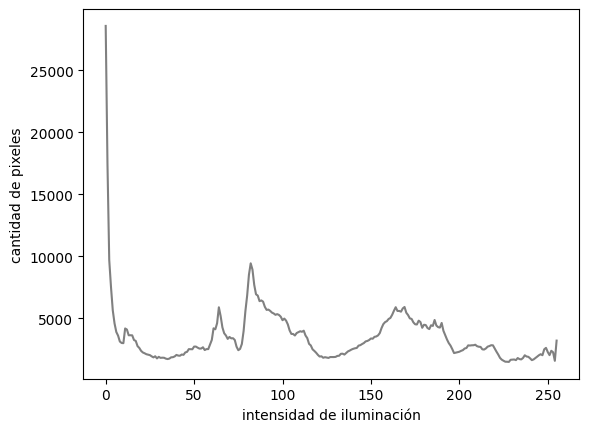

In [37]:
#HISTOGRAMA EN LA IMAGEN
#cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]]

hist = cv.calcHist([img], [0], None, [256], [0, 256])

plt.plot(hist, color='gray' )
plt.xlabel('intensidad de iluminación')
plt.ylabel('cantidad de pixeles')
plt.show()


In [38]:
cv.destroyAllWindows()

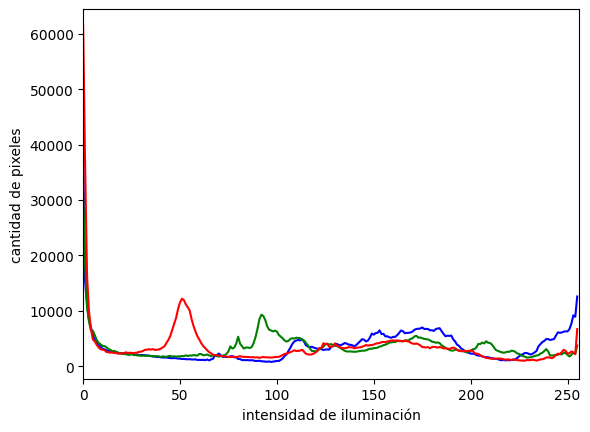

In [39]:
#HISTOGRAMA RGB
color = ('b','g','r')

for i, c in enumerate(color):
    hist = cv.calcHist([img2], [i], None, [256], [0, 256])
    plt.plot(hist, color = c)
    plt.xlim([0,256])
    plt.xlabel('intensidad de iluminación')
    plt.ylabel('cantidad de pixeles')

In [40]:
cv.destroyAllWindows()

In [41]:
#ECUALIZACIÓN DEL HISTOGRAMA

#Imagen muy clara
cv.imshow('img5', img5) 
cv.waitKey(0)

-1

In [42]:
#ECUALIZADA
img_eq = cv.equalizeHist(img5)

cv.imshow('Histograma', img_eq)
cv.waitKey(0)

-1

In [43]:
#Imagen muy oscura
cv.imshow('img6', img6) #oscura
cv.waitKey(0)

-1

In [44]:
#ECUALIZADA
img_eq2 = cv.equalizeHist(img6)

cv.imshow('Histograma', img_eq2)
cv.waitKey(0)

-1

In [45]:
#FILTROS DE CONVOLUCIÓN

# las imágenes también pueden ser filtradas con varios tipos de filtros, 
# como por ejemplo, filtros pasa bajo (FPB), filtros pasa alto (FPA), filtros pasa banda, etc. 
# Mientras que un FPB ayuda a eliminar el ruido en la imagen o a difuminar la imagen, 
# un FPA ayuda a encontrar los bordes en una imagen. La función cv2.filter2D(), disponible en OpenCV, 
# permite aplicar una convolución entre un kernel dado y una imagen. 
# El filtrado de una imagen dada con el kernel  funciona de la manera siguiente: 
# sobre cada pixel de la imagen se centra una ventana de 5×5. 
# Los píxeles contenidos en esta ventana se suman y se dividen por 25, y el valor resultante es asignado al pixel.
# Esto equivale a calcular el promedio del valor de los píxeles que caen en la ventana de 5×5.
# La operación se repite sobre todos los píxeles de la imagen, dando lugar a la imagen filtrada.
# El siguiente código genera el kernel K y lo aplica a una imagen

taj = cv.imread('taj.jpg')

In [46]:
#Suavizado / convolusión 2D

#Crea el kernel
kernel = np.ones((5,5),np.float32)/25

In [47]:
#Filtra la imagen utilizando el kernel anterior
dst = cv.filter2D(taj,-1,kernel) #  [ -1 will give the output image depth as same as the input image]

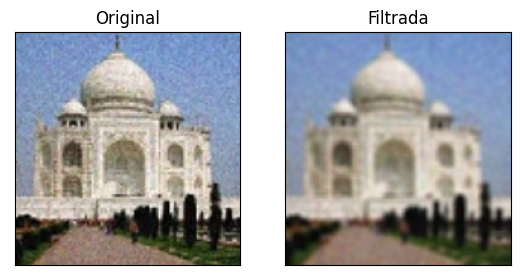

In [48]:
plt.subplot(121),plt.imshow(taj),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Filtrada')
plt.xticks([]), plt.yticks([])
plt.show()

In [51]:
# También hay filtros que eliminan el ruido con poco efecto sobre los bordes. 
# Tres de los técnicas de difuminado más utilizadas, que vienen implementados en OpenCV son:
# el promediado, los filtros gaussianos y los filtros de mediana

#Promedio
# Una manera alternativa de hacer esto es mediante las funciones cv2.blur() o cv2.boxFilter().  
# Al utilizar estas fucniones tenemos que especificar el ancho y la altura del kernel. 
# Un filtro de caja normalizado 3×3

blur = cv.blur(taj,(3,3))

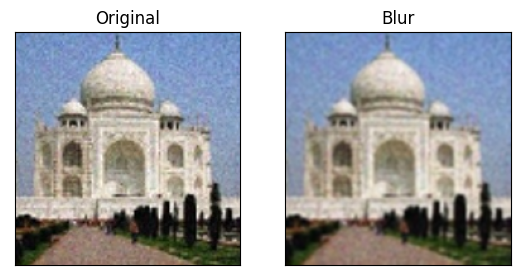

In [52]:
plt.subplot(121),plt.imshow(taj),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blur')
plt.xticks([]), plt.yticks([])
plt.show()

In [53]:
# Filtro de Mediana
# Este filtro calcula la mediana de todos los píxeles bajo la ventana del kernel y el píxel central
# se reemplaza con este valor mediano. Esto es muy efectivo para eliminar el ruido conocido como 
# ruido de sal y pimienta. OpenCV dispone de la función cv2.medianBlur() para aplicar este tipo de 
# filtro a una imagen. Al igual que en el filtro Gaussiano, el tamaño del kernel en el filtro de mediana 
# tiene que ser un número entero impar positivo.

median = cv.medianBlur(taj,5)

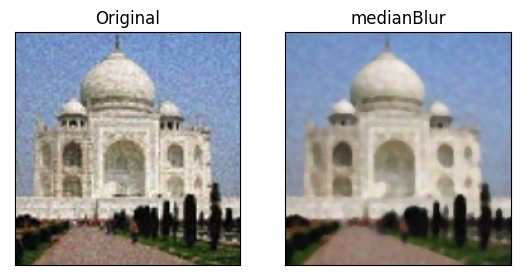

In [54]:
plt.subplot(121),plt.imshow(taj),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(median),plt.title('medianBlur')
plt.xticks([]), plt.yticks([])
plt.show()

In [55]:
#Gaussiano
gaussiano = cv.GaussianBlur(taj, (5,5), 0)

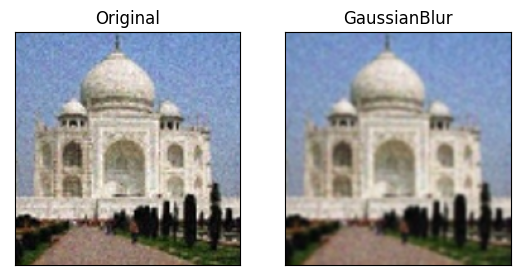

In [56]:
plt.subplot(121),plt.imshow(taj),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(gaussiano),plt.title('GaussianBlur')
plt.xticks([]), plt.yticks([])
plt.show()


In [66]:
#DETECCIÓN BORDES
#El detector de bordes Sobel se basa en el cálculo de la primera derivada. 
#Esta operación matemática mide las evoluciones y los cambios de una variable. 
#Básicamente se centra en detectar cambios de intensidad.
#Cuando hablamos de bordes en una imagen, hablamos de los píxeles donde hay un cambio de intensidad.

edge_img = cv.Canny(img,100,200) #límite superior e inferior de intensidad en la imagen aprox.

cv.imshow("Bordes detectados", edge_img)
cv.waitKey(0)

-1

In [64]:
#CONTAR OBJETOS
img7 = cv.imread('monedas.jpg')
gris = cv.cvtColor(img7, cv.COLOR_BGR2GRAY) # conversión de imagen a escala de grises

# Aplicar suavizado Gaussiano
gauss = cv.GaussianBlur(gris, (5,5),0)


In [65]:
cv.imshow('Filtro Gaussiano', gauss)
cv.waitKey(0)

-1

In [60]:
#Canny
canny = cv.Canny(gauss, 50, 150)

cv.imshow("Bordes detectados", canny)
cv.waitKey(0)

-1

In [61]:
#Dibujar y detectar contornos
# Buscamos los contornos dentro de los bordes detectados

#(contornos, jerarquia) = cv2.findContours(imagenbinarizada, modo_contorno, metodo_aproximacion)
(contornos,_) = cv.findContours(canny.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

In [73]:
#cv2.drawContours (imagen, lista_contornos, numero_contornos, color_RGB, grosor)
cv.drawContours(img7,contornos,-1,(0,0,255), 2)

cv.imshow("contornos", img7)
cv.waitKey(0)

-1

In [63]:
# Mostramos el número de monedas 
print("Se han encontrado {} objetos en la imagen".format(len(contornos)))

Se han encontrado 8 objetos en la imagen
